##    Comparative Analysis of 72-hour Simulations using the WRF Model for Hurricame Ianos (2020)

Hurricane Ianos developed over the Mediterranean Sea from September 15 to 21, 2020, having a great impact on western and central Greece. Using the WRF-4.3.3 model, a total of four experiments with 72-hour integrations were performed from September 16 to 19, 2020. The data source used to initialize the model was NCEP GDAS/FNL. For each experiment, physical parameterizations were modified in order to observe the variability between each one, likewise, data from in situ observations and ERA5 reanalysis data were used in order to compare relative humidity and wind intensity, as well as the trajectory of each experiment.

This notebook is intended to calculate statistical metric errors and to plot trajectories using the model output data

 Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

Reading trajectory files

In [2]:
EXP01 = pd.read_csv('C:/Users/Ulises Prado/OneDrive/Documentos/hur_coords-EXP01.txt', sep = ' ', names = ['date', 'lon', 'lat'])
EXP02 = pd.read_csv('C:/Users/Ulises Prado/OneDrive/Documentos/hur_coords-EXP02.txt', sep = ' ', names = ['date', 'lon', 'lat'])
EXP03 = pd.read_csv('C:/Users/Ulises Prado/OneDrive/Documentos/hur_coords-EXP03.txt', sep = ' ', names = ['date', 'lon', 'lat'])
EXP04 = pd.read_csv('C:/Users/Ulises Prado/OneDrive/Documentos/hur_coords-EXP04.txt', sep = ' ', names = ['date', 'lon', 'lat'])
ERA5 = pd.read_csv('C:/Users/Ulises Prado/OneDrive/Documentos/hur_coords-latlon.txt', sep = ' ', names = ['date', 'lon', 'lat'])

Plotting each trajectory 

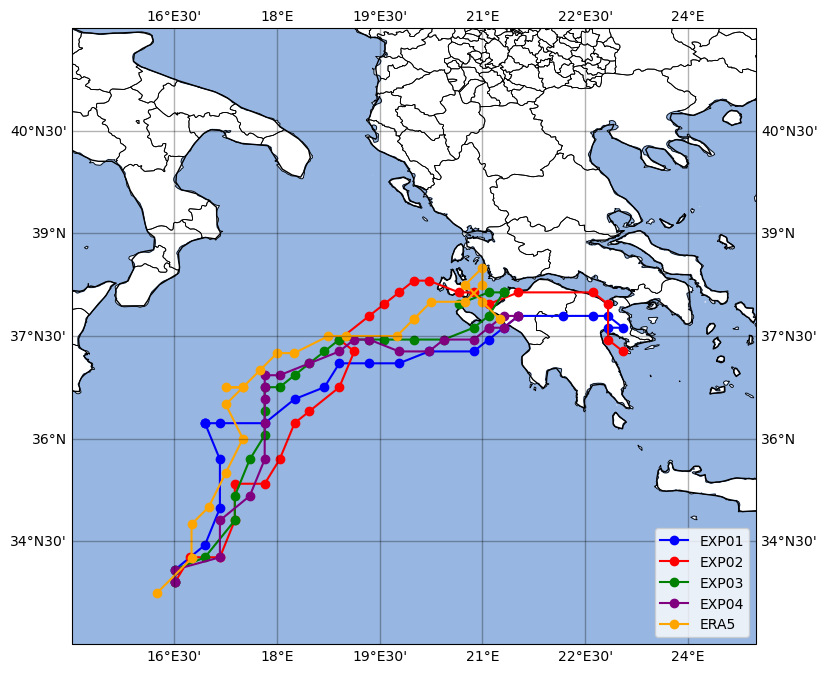

In [3]:
fig = plt.figure(figsize=(9,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Adding features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax.gridlines(draw_labels=True, dms = True, color = 'black', linewidth=1, alpha = 0.3)
ax.add_feature(cfeature.STATES, linewidth=0.6)
ax.add_feature(cfeature.OCEAN)

# Trajectories
ax.plot(EXP01['lon'], EXP01['lat'], 'o-', color = 'blue', label = 'EXP01')
ax.plot(EXP02['lon'], EXP02['lat'], 'o-', color = 'red', label = 'EXP02')
ax.plot(EXP03['lon'], EXP03['lat'], 'o-', color = 'green', label = 'EXP03')
ax.plot(EXP04['lon'], EXP04['lat'], 'o-', color = 'purple', label = 'EXP04')
ax.plot(ERA5['lon'], ERA5['lat'], 'o-', color = 'orange', label = 'ERA5')

ax.set_extent([15, 25, 33, 42], crs=ccrs.PlateCarree())
plt.legend(loc = 'lower right')
plt.savefig('Trayectorias.png', dpi = 900)
plt.show()

##### Calculating error metrics for trajectories using ERA5 reanalysis data as reference

In [4]:
# Errors for experiment 1
DIF1 = ERA5.merge(right = EXP01, how = 'inner', on = 'date', suffixes = ('_obs', '_model'))
DIF1['MFE'] = 111.11 * np.arccos(np.sin(DIF1['lat_obs']) * np.sin(DIF1['lat_model']) + np.cos(DIF1['lat_obs']) * np.cos(DIF1['lat_model']) * np.cos(DIF1['lon_obs'] - DIF1['lon_model']))
DIF1['MAE_lon'] = abs(DIF1['lon_model'] - DIF1['lon_obs']) 
DIF1['MAE_lat'] = abs(DIF1['lat_model'] - DIF1['lat_obs'])

In [5]:
# Errors for experiment 2
DIF2 = ERA5.merge(right = EXP02, how = 'inner', on = 'date', suffixes = ('_obs', '_model'))
DIF2['MFE'] = 111.11 * np.arccos(np.sin(DIF2['lat_obs']) * np.sin(DIF2['lat_model']) + np.cos(DIF2['lat_obs']) * np.cos(DIF2['lat_model']) * np.cos(DIF2['lon_obs'] - DIF2['lon_model']))
DIF2['MAE_lon'] = abs(DIF2['lon_model'] - DIF2['lon_obs']) 
DIF2['MAE_lat'] = abs(DIF2['lat_model'] - DIF2['lat_obs'])

In [6]:
# Errors for experiment 3
DIF3 = ERA5.merge(right = EXP03, how = 'inner', on = 'date', suffixes = ('_obs', '_model'))
DIF3['MFE'] = 111.11 * np.arccos(np.sin(DIF3['lat_obs']) * np.sin(DIF3['lat_model']) + np.cos(DIF3['lat_obs']) * np.cos(DIF3['lat_model']) * np.cos(DIF3['lon_obs'] - DIF3['lon_model']))
DIF3['MAE_lon'] = abs(DIF3['lon_model'] - DIF3['lon_obs']) 
DIF3['MAE_lat'] = abs(DIF3['lat_model'] - DIF3['lat_obs'])

In [7]:
# Errors for experiment 4
DIF4 = ERA5.merge(right = EXP04, how = 'inner', on = 'date', suffixes = ('_obs', '_model'))
DIF4['MFE'] = 111.11 * np.arccos(np.sin(DIF4['lat_obs']) * np.sin(DIF4['lat_model']) + np.cos(DIF4['lat_obs']) * np.cos(DIF4['lat_model']) * np.cos(DIF4['lon_obs'] - DIF4['lon_model']))
DIF4['MAE_lon'] = abs(DIF4['lon_model'] - DIF4['lon_obs']) 
DIF4['MAE_lat'] = abs(DIF4['lat_model'] - DIF4['lat_obs'])

In [8]:
# Dataframe for trajectory error metrics
Metrics = {'Experimento': ['EXP01', 'EXP02', 'EXP03', 'EXP04'],
            'MFE': [DIF1['MFE'].mean(), DIF2['MFE'].mean(), DIF3['MFE'].mean(), DIF3['MFE'].mean()],
            'MAE_lon': [DIF1['MAE_lon'].mean(), DIF2['MAE_lon'].mean(), DIF3['MAE_lon'].mean(), DIF4['MAE_lon'].mean()],
            'MAE_lat': [DIF1['MAE_lat'].mean(), DIF2['MAE_lat'].mean(), DIF3['MAE_lat'].mean(), DIF4['MAE_lat'].mean()]
          } 
Metrics = pd.DataFrame(Metrics)

##### Visualization for trajectory error metrics

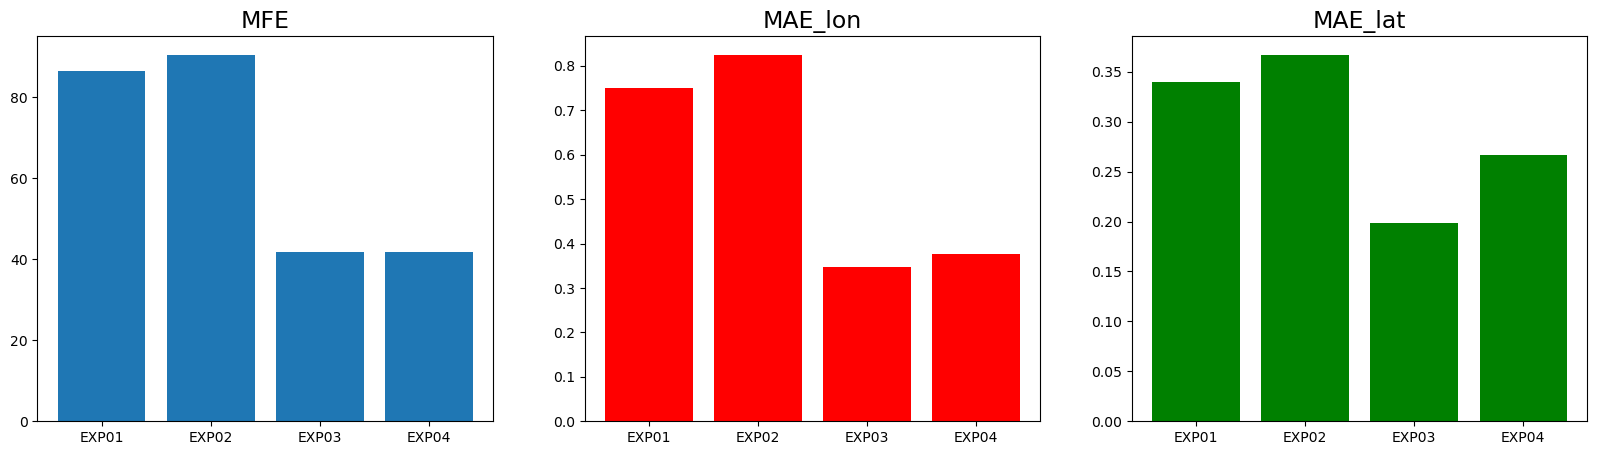

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20, 5))

ax1.bar(Metrics['Experimento'], Metrics['MFE'])
ax1.set_title('MFE', fontsize = 17)

ax2.bar(Metrics['Experimento'], Metrics['MAE_lon'], color = 'red')
ax2.set_title('MAE_lon', fontsize = 17)

ax3.bar(Metrics['Experimento'], Metrics['MAE_lat'], color = 'green')
ax3.set_title('MAE_lat', fontsize= 17)

plt.savefig('TrayErrors.png', dpi = 800)
plt.show()

Although experiments 3 and 4 presented an equal value of the MFE (41.89), it was not the same for the longitudinal MAE where experiment 3 had a value of 0.34 against 0.37 of experiment 4. On the other hand, the latitudinal MAE experiment 3 presented a value of 0.19 and experiment 4 a value of 0.26, therefore, experiment 3 was the one that showed the best performance.

##### Error metrics for relative humidity and wind speed variables using in situ observations

Reading files

In [11]:
station1 = pd.read_csv('LGZA.csv')
u = pd.read_csv('ts_u10m_Zakynthos-01.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'u'])
v = pd.read_csv('ts_v10m_Zakynthos-01.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'v'])
station1['Modelado'] = np.sqrt(u['u']**2 + v['v']**2)

In [12]:
station2 = pd.read_csv('LGZA.csv')
u2 = pd.read_csv('ts_u10m_01005-02.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'u'])
v2 = pd.read_csv('ts_v10m_01005-02.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'v'])
station2['Modelado'] = np.sqrt(u2['u']**2 + v2['v']**2)

In [13]:
station3 = pd.read_csv('LGZA.csv')
u3 = pd.read_csv('ts_u10m_01005-03.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'u'])
v3 = pd.read_csv('ts_v10m_01005-03.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'v'])
station3['Modelado'] = np.sqrt(u3['u']**2 + v3['v']**2)

In [14]:
station4 = pd.read_csv('LGZA.csv')
u4 = pd.read_csv('ts_u10m_01005-04.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'u'])
v4 = pd.read_csv('ts_v10m_01005-04.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'v'])
station4['Modelado'] = np.sqrt(u4['u']**2 + v4['v']**2)

In [15]:
rhobs = pd.read_excel('LGZA RH.xlsx')
rh1 = pd.read_csv('ts_rh2_01005-01exp1.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'rh'])
rh2 = pd.read_csv('ts_rh2_01005-01exp2.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'rh'])
rh3 = pd.read_csv('ts_rh2_01005-01exp3.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'rh'])
rh4 = pd.read_csv('ts_rh2_01005-01exp4.txt', sep = "\s+", names = ['year', 'month', 'day', 'hour', 'rh'])

##### Calculating correlation index

In [18]:
CorrV = {'Observado': station1['Observado'],
         'EXP01': station1['Modelado'],
         'EXP02': station2['Modelado'],
         'EXP03': station3['Modelado'],
         'EXP04': station4['Modelado']
}
CorrRH = {'Observado': rhobs['relh'],
         'EXP01': rh1['rh'],
         'EXP02': rh2['rh'],
         'EXP03': rh3['rh'],
         'EXP04': rh4['rh']
}
CorrV = pd.DataFrame(CorrV)
CorrRH = pd.DataFrame(CorrRH)
matrixV = CorrV.corr().round(3)
matrixRH = CorrRH.corr().round(3)

##### Plotting correlation matrix

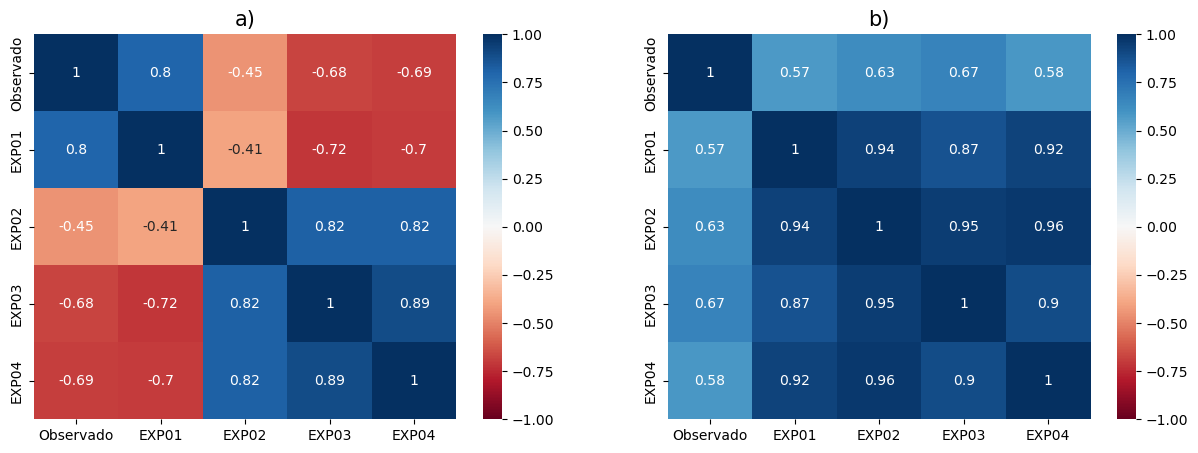

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

# Wind speed
sns.heatmap(matrixV, annot=True, vmax=1, vmin=-1, center=0, cmap = 'RdBu', ax = ax1)
ax1.set_title('a)', fontsize = 15)

# Relative humidity
sns.heatmap(matrixRH, annot=True, vmax=1, vmin=-1, center=0, cmap = 'RdBu', ax = ax2)
ax2.set_title('b)', fontsize = 15)

plt.savefig('heatmaps.png', dpi = 900)
plt.show()

##### Mean Squared Error 

In [21]:
# Wind Speed
VMSE1 = mean_squared_error(CorrV['Observado'], CorrV['EXP01'])
VMSE2 = mean_squared_error(CorrV['Observado'], CorrV['EXP02'])
VMSE3 = mean_squared_error(CorrV['Observado'], CorrV['EXP03'])
VMSE4 = mean_squared_error(CorrV['Observado'], CorrV['EXP04'])

# Relative Humidty
rhMSE1 = mean_squared_error(CorrRH['Observado'], CorrRH['EXP01'])
rhMSE2 = mean_squared_error(CorrRH['Observado'], CorrRH['EXP02'])
rhMSE3 = mean_squared_error(CorrRH['Observado'], CorrRH['EXP03'])
rhMSE4 = mean_squared_error(CorrRH['Observado'], CorrRH['EXP04'])

##### Creating dataframes for wind speed and relative humidity error metrics 

In [22]:
WindError = {'Experimento': ['EXP01', 'EXP02', 'EXP03', 'EXP04'],
            'RMSE': [np.sqrt(VMSE1), np.sqrt(VMSE2), np.sqrt(VMSE3), np.sqrt(VMSE4)],
            'MAE': [mean_absolute_error(CorrV['Observado'], CorrV['EXP01']), mean_absolute_error(CorrV['Observado'], CorrV['EXP02']), mean_absolute_error(CorrV['Observado'], CorrV['EXP03']), mean_absolute_error(CorrV['Observado'], CorrV['EXP04'])]
          } 
rhError = {'Experimento': ['EXP01', 'EXP02', 'EXP03', 'EXP04'],
            'RMSE': [np.sqrt(rhMSE1), np.sqrt(rhMSE2), np.sqrt(rhMSE3), np.sqrt(rhMSE4)],
            'MAE': [mean_absolute_error(CorrRH['Observado'], CorrRH['EXP01']), mean_absolute_error(CorrRH['Observado'], CorrRH['EXP02']), mean_absolute_error(CorrRH['Observado'], CorrRH['EXP03']), mean_absolute_error(CorrRH['Observado'], CorrRH['EXP04'])]
          }
WindError = pd.DataFrame(WindError)
rhError = pd.DataFrame(rhError)

##### Plotting RMSE and MAE 

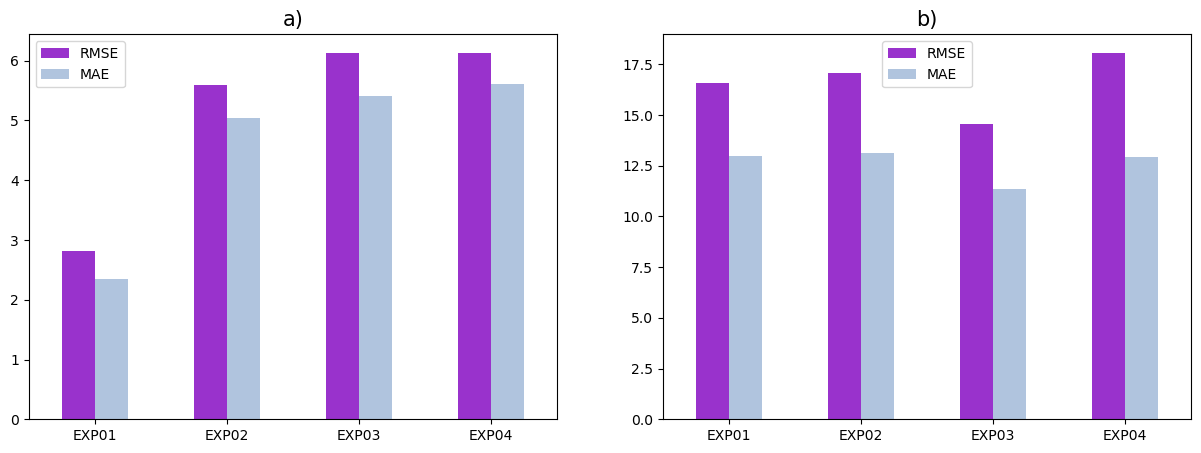

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 5))

# Wind Speed
WindError.plot(x='Experimento', y= ['RMSE', 'MAE'], kind='bar', ax = ax1, rot = 0, color = ['darkorchid', 'lightsteelblue'])
ax1.set_xlabel('')
ax1.set_title('a)', fontsize = 15)

# Relative Humidity
rhError.plot(x='Experimento', y= ['RMSE', 'MAE'], kind='bar', ax = ax2, rot = 0, color = ['darkorchid', 'lightsteelblue'])
ax2.set_xlabel('')
ax2.set_title('b)', fontsize = 15)

plt.savefig('RMSEmae.png', dpi = 900)
plt.show()

From the results obtained, it was found that experiment 1 showed the lowest error in terms of RMSE (2.81) and MAE (2.34) for wind speed; however, for relative humidity, experiment 3 showed the best performance, with an RMSE of 14.55 and a MAE of 11.35.

For more details on the methodology, data collection and interpretation of results, see the document available in the repository

### Author 
##### Ulises Prado